<a href="https://colab.research.google.com/github/oliverzannino/oliverza/blob/main/Final2025Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-family:Impact,Arial;font-size:30px;">37005 Fundamentals of Derivative Security Pricing - Spring 2025</h1>
<h1 style="font-family:Impact,Arial;font-size:45px;">Assignment Part 3</h1>
<h2 style="font-family:Arial;">Erik Schl&ouml;gl</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:Erik.Schlogl@uts.edu.au?Subject=37000 JIT" target="_blank">
<small><font color=MediumVioletRed>Erik.Schlogl@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

<h1 style="font-family:Impact,Arial;font-size:30px;">Currency option market quotes</h1>

Currency options are often quoted in the market in terms of implied volatilities, for at–the–money (ATM), and for 25% and 10% "delta" risk reversals (RR) and butterflies (BF). The quoted ATM volatility is the Black/Scholes implied volatility of an option with strike equal to the forward exchange rate. The "implied volatility" of an $x\%$ delta risk reversal is given by the difference between the Black/Scholes implied volatility of an $x\%$ delta out–of–the–money call and the Black/Scholes implied volatility of an $x\%$ delta out–of–the–money put. The "implied volatility" of an $x\%$ delta butterfly is given by the average of the Black/Scholes implied volatility of an $x\%$ delta out–of–the–money call and the Black/Scholes implied volatility of an $x\%$ delta out–of–the–money put, minus the ATM volatility. Consider the following data for currency options maturing in one month’s time (implied volatilities in percentage points):

<table>
    <tr><th>ATM </th><th> 25D RR </th><th> 25D BF </th><th> 10D RR </th><th> 10D BF </th></tr>
    <tr><th>9.5750 </th><th> -0.4500 </th><th>0.2750 </th><th>-0.7500 </th><th>1.1250 </th></tr>
</table>

The spot exchange rate is 1.47565 units of domestic currency per unit of foreign currency, the domestic interest rate $r$ is 3.285% continuously compounded and the foreign interest rate $r_f$ is 4.179% continuously compounded.

<B>Task 1:</B> Determine the Black/Scholes implied volatilities of the out–of–the–money call and put options. Plot the implied volatility smile. <I>(4 marks)</I>

BS Implied volatility of 25d OTM Call: 9.625%
BS Implied volatility of 25d OTM Put: 10.075%
BS Implied volatility of 10d OTM Call: 10.325
BS Implied volatility of 10d OTM Put: 11.075%


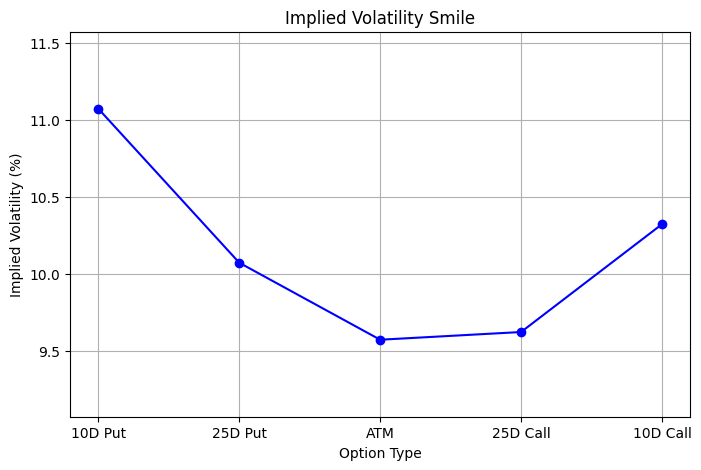

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from math import factorial

# your code here

x = 1.47565
r = 0.03285
rf = 0.04179
T = 1/12

atmvol = 9.5750
rr25d = -0.45
bf25d = 0.275
rr10d = -0.75
bf10d = 1.125

# using algebra, we have
#1) 25dRR = 25dCallvol - 25dPutvol
#2) 25dBF = (25dCallvol + 25dPutvol)/2 - atmvol
#2) 2 * 25dBF = (25dCallvol + 25dPutvol) - 2atmvol

# we therefore have 2 equations
#1) 25dCallvol - 25dPutvol = 25dRR
#2) 25dCallvol + 25dPutvol = 2 * 25dBF + 2atmvol

#adding them together
# 2*25dCallVol = 25dRR + 2*25dBF + 2atmvol
# 25dCallVol = 25dBF + atmvol + 25dRR/2 (!)

# substituting this in to 2)
#25dPutVol = 2*25dBF + 2atmvol - (25dBF + atmvol + 25dRR/2) (!)
# 25dPut Vol = 25dBF + atmvol - 25dRR/2 (2!)

CallVol25d = bf25d + atmvol + rr25d/2
PutVol25d = bf25d + atmvol - rr25d/2

print(f"BS Implied volatility of 25d OTM Call: {CallVol25d}%")
print(f"BS Implied volatility of 25d OTM Put: {PutVol25d}%")

# by the same logic, 10dCall Vol = 10dBF + atmvol + 10dRR/2 , while 10dPut Vol = 10dBF + atmvol - 10dRR/2

CallVol10d = bf10d + atmvol + rr10d/2
PutVol10d = bf10d + atmvol - rr10d/2

print(f"BS Implied volatility of 10d OTM Call: {CallVol10d}")
print(f"BS Implied volatility of 10d OTM Put: {PutVol10d}%")

import matplotlib.pyplot as plt

# Labels for the x-axis
x_labels = ["10D Put", "25D Put", "ATM", "25D Call", "10D Call"]

# Corresponding implied volatilities (in %)
vols = [11.075, 10.075, 9.575, 9.625, 10.325]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_labels, vols, marker='o', linestyle='-', color='blue')
plt.title("Implied Volatility Smile")
plt.xlabel("Option Type")
plt.ylabel("Implied Volatility (%)")
plt.grid(True)
plt.ylim(min(vols) - 0.5, max(vols) + 0.5)
plt.show()


In the market quotes above, the delta determines the strikes of the out–of–the–money options, which are such that the absolute value of the option delta equals the prescribed level. For the options considered here, we have for the strike $K_{\omega,\Delta}$:
$$ K_{\omega,\Delta} = F(0,T)\exp\left\{-\omega N^{-1}(\omega e^{r_fT}\Delta)\sigma_{\omega,\Delta}\sqrt{T}+\frac12\sigma^2_{\omega,\Delta}T\right\} $$
where $F(0,T)$ is the forward exchange rate for the option maturity $T$, $\omega = 1$ for a call and $\omega = -1$ for a put, $\Delta$ is the option delta (where put option delta is negative), and $\sigma_{\omega,\Delta}$ is the Black/Scholes implied volatility of the (call or put) option with delta $\Delta$. $N^{-1}$ is the inverse of the standard normal cumulative distribution function - this is available as `norm.ppf()` in the `scipy.stats` package.

**Task 2:** Calculate the five option strikes for the European options determining the quotes in the above table. Determine the prices of European call options at these five strikes consistent with the above quotes (you may assume that put/call parity holds, i.e. the Black/Scholes implied volatilities of call and put options at a fixed strike are the same). <I>(4 marks)</I>

In [2]:
#task 2
#  first need to calculate F(0,T)
F = x * np.exp((r - rf)*T)
print("Forward Exchange Rate:", F) # this is atm strike
print("Strike of ATM option:", F)

Forward Exchange Rate: 1.4745510501596442
Strike of ATM option: 1.4745510501596442


In [3]:
import numpy as np
from scipy.stats import norm

vols = {
    "25d_call": 0.09625,
    "25d_put": 0.10075,
    "10d_call": 0.10325,
    "10d_put": 0.11075,
}

# keep deltas in absolute value form (-omega ensures correct sign)
deltas = {
    "25d_call": 0.25,
    "25d_put": 0.25,
    "10d_call": 0.10,
    "10d_put": 0.10,
}

omegas = {
    "25d_call": 1,
    "25d_put": -1,
    "10d_call": 1,
    "10d_put": -1,
}

# Mapping keys to print variable names for output
name_map = {
    "10d_put": "tenpstrike",
    "25d_put": "twentyfivepstrike",
    "25d_call": "twentyfivecstrike",
    "10d_call": "tencstrike",
}

# Compute strikes in a loop
strikes = {}
for key in name_map:
    delta = deltas[key]
    omega = omegas[key]
    vol = vols[key]

    ppf_arg = np.exp(rf * T) * delta
    ppf_val = norm.ppf(ppf_arg)

    term1 = -omega * ppf_val * vol * np.sqrt(T)
    term2 = 0.5 * vol**2 * T

    exponent = term1 + term2
    strike = F * np.exp(exponent)

    strikes[key] = strike
    print(f"{name_map[key]} = {strike}")

tenpstrike = 1.4161698164742649
twentyfivepstrike = 1.4466338652393922
twentyfivecstrike = 1.5029112684680703
tencstrike = 1.5325547886489035


In [4]:
K_25c = strikes["25d_call"]
K_25p = strikes["25d_put"]
K_10c = strikes["10d_call"]
K_10p = strikes["10d_put"]

print(f"Strike of 10d Put: {K_10p:.6f}")
print(f"Strike of 25d Put: {K_25p:.6f}")
print(f"ATM Strike: {F:.6f}")
print(f"Strike of 25d Call: {K_25c:.6f}")
print(f"Strike of 10d Call: {K_10c:.6f}")

Strike of 10d Put: 1.416170
Strike of 25d Put: 1.446634
ATM Strike: 1.474551
Strike of 25d Call: 1.502911
Strike of 10d Call: 1.532555


In [5]:
#verify manually

first = F * np.exp(-(-1)*norm.ppf(-1*np.exp(rf*T)*-0.10)*(PutVol10d/100) * np.sqrt(T) + 1/2 * (PutVol10d/100)**2 * T)
print(first)

second = F * np.exp(-(-1)*norm.ppf(-1*np.exp(rf*T)*-0.25)*(PutVol25d/100) * np.sqrt(T) + 1/2 * (PutVol25d/100)**2 * T)
print(second)

third = F * np.exp(-1*norm.ppf(1*np.exp(rf*T)*0.25)*(CallVol25d/100) * np.sqrt(T) + 1/2 * (CallVol25d/100)**2 * T)
print(third)

fourth = F * np.exp(-1*norm.ppf(1*np.exp(rf*T)*0.10)*(CallVol10d/100) * np.sqrt(T) + 1/2 * (CallVol10d/100)**2 * T)
print(fourth)

1.4161698164742649
1.4466338652393922
1.5029112684680703
1.5325547886489035


In [6]:
#price function for fx call option

def bs_fx_call_price(X, K, T, r, rf, sigma):
    d1 = (np.log(X/K) + (r - rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = np.exp(-rf * T) * X * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)
    return call_price

In [7]:
import numpy as np
from scipy.stats import norm

K_25c = strikes["25d_call"]
K_25p = strikes["25d_put"]  #assume PCP holds i.e BS vols for puts and calls at the same strike are equal
K_10c = strikes["10d_call"]
K_10p = strikes["10d_put"]  #assume PCP holds i.e BS vols for puts and calls at the same strike are equal
K_atm = F

def bs_fx_call_price(X, K, T, r, rf, sigma):
    d1 = (np.log(X/K) + (r - rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = np.exp(-rf * T) * X * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)
    return call_price

X = x # spot price

# Calculate prices
call_prices = {
    "10dputstrike_callprice": bs_fx_call_price(X, K_10p, T, r, rf, PutVol10d/100),
    "25dputstrike_callprice": bs_fx_call_price(X, K_25p, T, r, rf, PutVol25d/100),
    "atm_call": bs_fx_call_price(X, K_atm, T, r, rf, atmvol/100),
    "25d_call_price": bs_fx_call_price(X, K_25c, T, r, rf, CallVol25d/100),
    "10d_call_price": bs_fx_call_price(X, K_10c, T, r, rf, CallVol10d/100),
}

print(f"Price of 1m European call at strike {K_10p:.6f} (= 10d put strike): {call_prices['10dputstrike_callprice']:.6f}")
print(f"Price of 1m European call at strike {K_25p:.6f} (= 25d put strike): {call_prices['25dputstrike_callprice']:.6f}")
print(f"Price of 1m ATM European call at strike {K_atm:.6f} (= forward price): {call_prices['atm_call']:.6f}")
print(f"Price of 1m European call at strike {K_25c:.6f} (= 25d call strike): {call_prices['25d_call_price']:.6f}")
print(f"Price of 1m European call at strike {K_10c:.6f} (= 10d call strike): {call_prices['10d_call_price']:.6f}")

Price of 1m European call at strike 1.416170 (= 10d put strike): 0.060487
Price of 1m European call at strike 1.446634 (= 25d put strike): 0.034344
Price of 1m ATM European call at strike 1.474551 (= forward price): 0.016215
Price of 1m European call at strike 1.502911 (= 25d call strike): 0.006038
Price of 1m European call at strike 1.532555 (= 10d call strike): 0.002058


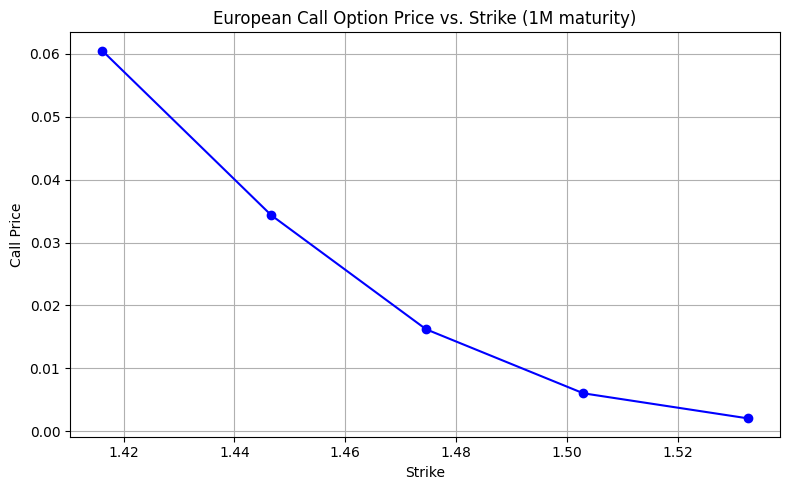

In [8]:
# Plotting call prices vs. strike
import matplotlib.pyplot as plt
import numpy as np

# Strikes (from the 'strikes' dictionary and ATM strike)
# Order them from lowest to highest strike for plotting
strikes_ordered = [
    strikes["10d_put"],
    strikes["25d_put"],
    K_atm, # ATM strike is the forward rate
    strikes["25d_call"],
    strikes["10d_call"]
]

# Corresponding call prices (get them in the same order as the strikes)
call_prices_ordered = [
    call_prices['10dputstrike_callprice'],
    call_prices['25dputstrike_callprice'],
    call_prices['atm_call'],
    call_prices['25d_call_price'],
    call_prices['10d_call_price']
]


# Plotting
plt.figure(figsize=(8, 5))
plt.plot(strikes_ordered, call_prices_ordered, marker='o', linestyle='-', color='blue')
plt.title("European Call Option Price vs. Strike (1M maturity)")
plt.xlabel("Strike")
plt.ylabel("Call Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
## double check to see vol is correct by setting up function
from scipy.optimize import brentq

def implied_vol_call(price, S0, K, T, r, rf, tol=1e-6):
    def objective(sigma):
        return bs_fx_call_price(S0, K, T, r, rf, sigma) - price

    # Try to solve in the range of [0.0001, 3.0]
    try:
        implied_vol = brentq(objective, 1e-4, 3.0, xtol=tol)
        return implied_vol
    except ValueError:
        return np.nan  # return NaN if no solution

In [10]:
backout_vol_10p = implied_vol_call(call_prices['10dputstrike_callprice'], X, K_10p, T, r, rf)
print(f"Implied volatility (10p): {backout_vol_10p * 100:.4f}%")

backout_vol_25p = implied_vol_call(call_prices['25dputstrike_callprice'], X, K_25p, T, r, rf)
print(f"Implied volatility (25p): {backout_vol_25p * 100:.4f}%")

backout_vol_atm = implied_vol_call(call_prices['atm_call'], X, F, T, r, rf)
print(f"Implied volatility (ATM): {backout_vol_atm * 100:.4f}%")

backout_vol_25c = implied_vol_call(call_prices['25d_call_price'], X, K_25c, T, r, rf)
print(f"Implied volatility (25c): {backout_vol_25c * 100:.4f}%")

backout_vol_10c = implied_vol_call(call_prices['10d_call_price'], X, K_10c, T, r, rf)
print(f"Implied volatility (10c): {backout_vol_10c * 100:.4f}%")

Implied volatility (10p): 11.0750%
Implied volatility (25p): 10.0750%
Implied volatility (ATM): 9.5750%
Implied volatility (25c): 9.6250%
Implied volatility (10c): 10.3250%


<h1 style="font-family:Impact,Arial;font-size:30px;">Option pricing in the presence of jumps</h1>

Consider the option pricing formula in the Black/Scholes model augmented by jumps, as derived in Lecture 10 (see Equation (70) of that lecture). Note that the relevant inputs defining the stochastic dynamics of the underlying asset under the risk-neutral measure are the initial asset price $S$, the volatility of the diffusion component $\sigma$, the continuously compounded interest rate $r$, the intensity $\lambda$ of the Poisson process triggering the jumps (see Slide 6 of the lecture), the expected proportional change $k$ in the asset price when a jump occurs (defined in Equation (24) of the lecture), and the standard deviation of the logarithmic proportional jumps $\delta$ (as defined by Equation (28) of the lecture).

**Task 3**

Using the scaffold provided, implement a Python function `JumpBlackScholes(S,K,sgm,r,T,callput,k,lam,delta,eps)`, returning the price of a European option in the Black/Scholes model augmented by jumps, with arguments of `S =` $S$, `sgm =` $\sigma$, `r =` $r$, `k =` $k$, `lam =` $\lambda$, `delta =` $\delta$, as well as the strike `K` and maturity `T` of the option, where `callput` is $1$ for a call and $-1$ for a put, and the infinite sum in Equation (70) of the lecture is truncated once further terms in the summation decrease below the threshold given by `eps`. <I>(4 marks)</I>

Note that the factorial appearing in Equation (70) can be evaluated using the function `factorial` imported from the `math` package.

**Example**

`Enter the underlying stock price: 100`\
`Enter the strike price: 110`\
`Enter the volatility: 0.2`\
`Enter continuously compounded interest rate: 0.05`\
`Enter the time to maturity: 0.5 `\
`Enter 1 for call or -1 for put option: 1 `\
`Enter the expected proportional change in the asset price when a jump occurs: 0.1 `\
`Enter the intensity of the jump process: 1.0 `\
`Enter the standard deviation of the logarithmic proportional jumps: 0.05 `\
`Enter the threshold at which to truncate the infinite sum: 1e-7 `\
`The option price is 3.6994861009744047`

In [11]:
import math
from scipy.stats import norm

def BlackScholesPrice1(S, K, sigma, r, T, callput):
    if T <= 0:
        return max(callput * (S - K), 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if callput == 1:
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def JumpBlackScholes1(S, K, sgm, r, T, callput, k, lam, delta, eps):
    lam_prime = lam * (1 + k)
    sum_price = 0.0
    n = 0

    while True:
        # Poisson probability weight
        poisson_weight = np.exp(-lam_prime * T) * (lam_prime * T) ** n / math.factorial(n)

        # Adjusted volatility and drift
        sigma_n = np.sqrt(sgm ** 2 + n * delta ** 2 / T)
        r_n = r - lam * k + n * np.log(1 + k) / T

        # M_n(x, T): Black-Scholes price with adjusted params
        Mn = BlackScholesPrice1(S, K, sigma_n, r_n, T, callput)

        term = poisson_weight * Mn
        sum_price += term

        # Break if term is small
        if abs(term) < eps:
            break

        n += 1
        if n > 100:  # Safety to prevent infinite loop
            break

    return sum_price

In [21]:
stock = float(input('Enter the underlying stock price: '))
strike = float(input('Enter the strike price: '))
sigma = float(input('Enter the volatility: '))
interest = float(input('Enter continuously compounded interest rate: '))
maturity = float(input('Enter the time to maturity: '))
callput = int(input('Enter 1 for call or -1 for put option: '))
k = float(input('Enter the expected proportional change in the asset price when a jump occurs: '))
lam = float(input('Enter the intensity of the jump process: '))
delta = float(input('Enter the standard deviation of the logarithmic proportional jumps: '))
eps = float(input('Enter the threshold at which to truncate the infinite sum: '))
result = JumpBlackScholes1(stock,strike,sigma,interest,maturity,callput,k,lam,delta,eps)
print('The option price is '+str(result))

Enter the underlying stock price: 100
Enter the strike price: 110
Enter the volatility: 0.2
Enter continuously compounded interest rate: 0.05
Enter the time to maturity: 0.5
Enter 1 for call or -1 for put option: 1
Enter the expected proportional change in the asset price when a jump occurs: 0.1
Enter the intensity of the jump process: 1
Enter the standard deviation of the logarithmic proportional jumps: 0.05
Enter the threshold at which to truncate the infinite sum: 1e-7
The option price is 3.6994861009744047


**Task 4:** Consider a Black/Scholes model augmented by jumps with parameters as in the example above. If market prices of call and put options were given by such a model, what would be the (standard Black/Scholes) implied volatilities for at–the–money (ATM), and for 25% and 10% delta risk reversals and butterflies? What are the strikes of the out-of-the-money options making up the risk reversals and butterflies? Plot the implied volatility smile given by the market in this case. <I>(4 marks)</I>

In [13]:
#task 4

import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
from math import factorial, exp, log, sqrt
import matplotlib.pyplot as plt

# The key idea is that the implied volatility for a given strike K is the volatility that,
# when plugged into the standard BS formula, reproduces the jump model's price for that option.

# Parameters from the example
S = 100
sgm = 0.2
r = 0.05
T = 0.5
callput = 1  # For calls. But recall that by put call parity, for a given strike, the implied volatility will be the same regardless of put or call
k = 0.1
lam = 1.0
delta = 0.05
eps = 1e-7

# Compute forward for the ATM strike (continuing to use this assumption as earlier mentioned)
F1 = S * exp(r * T)

# ATM IV solver
def atm_iv_solver(sigma_guess=0.2):
    def objective(sigma):
        if sigma <= 0:
            return 1e10
        # Compute ATM strike for this sigma
        K_atm = F1
        # Compute prices
        jump_price = JumpBlackScholes1(S, K_atm, sgm, r, T, callput, k, lam, delta, eps)
        bs_price = BlackScholesPrice1(S, K_atm, sigma, r, T, callput)
        return bs_price - jump_price
    return brentq(objective, 0.001, 2.0)

sigma_atm = atm_iv_solver()
print(F1)
sigma_atm

102.53151205244289


0.22700474239100368

In [14]:
# Delta IV solver
def delta_iv_solver(target_N, sigma_guess=0.2):
    def objective(sigma):
        if sigma <= 0:
            return 1e10
        d = norm.ppf(target_N)
        K = S * exp((r + 0.5 * sigma**2) * T - sigma * sqrt(T) * d)
        jump_price = JumpBlackScholes1(S, K, sgm, r, T, callput, k, lam, delta, eps)
        bs_price = BlackScholesPrice1(S, K, sigma, r, T, callput)
        return bs_price - jump_price
    return brentq(objective, 0.001, 2.0)

# Compute IVs
sigma_25c = delta_iv_solver(0.25)
sigma_25p = delta_iv_solver(0.75) # treat the 25d P as 75d C
sigma_10c = delta_iv_solver(0.10)
sigma_10p = delta_iv_solver(0.90) # treat the 10d P as 90d C

# Function to get strike for given sigma and target_N
def get_delta_strike(sigma, target_N):
    d = norm.ppf(target_N)
    return S * exp((r + 0.5 * sigma**2) * T - sigma * sqrt(T) * d)

# Compute strikes
K1 = get_delta_strike(sigma_10p, 0.90)
K2 = get_delta_strike(sigma_25p, 0.75)
K3 = get_delta_strike(sigma_25c, 0.25)
K4 = get_delta_strike(sigma_10c, 0.10)

# Compute RR and BF
rr_25 = sigma_25c - sigma_25p
bf_25 = (sigma_25c + sigma_25p) / 2 - sigma_atm
rr_10 = sigma_10c - sigma_10p
bf_10 = (sigma_10c + sigma_10p) / 2 - sigma_atm

# For plotting the implied volatility smile from the jump-diffusion model using specific points

import matplotlib.pyplot as plt
import numpy as np

# Strikes and IVs for the specific points from cell ADAhdvYQeQYz
strikes_specific = [K1, K2, F1, K3, K4] # 10d Put, 25d Put, ATM, 25d Call, 10d Call strikes
ivs_specific = [sigma_10p, sigma_25p, sigma_atm, sigma_25c, sigma_10c] # Corresponding IVs

# Labels for the x-axis
x_labels = ["10D Put", "25D Put", "ATM", "25D Call", "10D Call"]

,Option Type,Strike,BS Implied Volatility (%)
0,10D Put,85.012014,22.014440
1,25D Put,93.331904,22.322894
2,ATM,102.531512,22.700474
3,25D Call,116.157469,23.313172
4,10D Call,129.193056,23.927013



Implied RR and BF (%)
-------------------

25-Delta RR: 0.9902778848222438
25-Delta BF: 0.11755850322610062
10-Delta RR: 1.9125729604732662
10-Delta BF: 0.27025251113471926


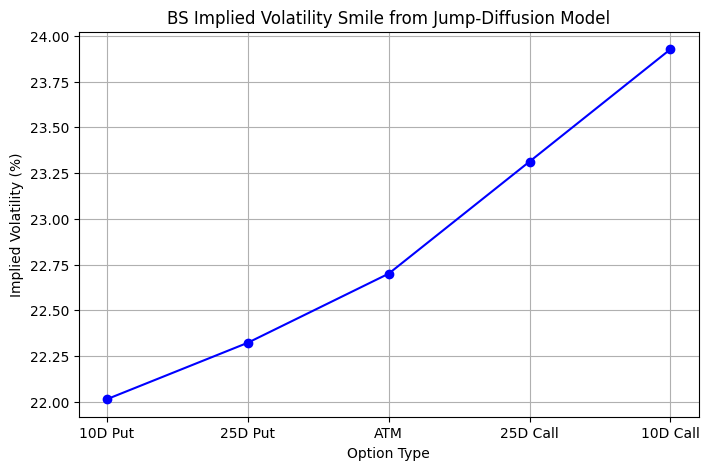

In [15]:
# Create a DataFrame to display strikes and implied volatilities
import pandas as pd

data = {
    "Option Type": ["10D Put", "25D Put", "ATM", "25D Call", "10D Call"],
    "Strike": [K1, K2, F1, K3, K4],
    "BS Implied Volatility (%)": [sigma_10p * 100, sigma_25p * 100, sigma_atm * 100, sigma_25c * 100, sigma_10c * 100]
}

df = pd.DataFrame(data)
display(df)

# Print RR and BF values
print("\nImplied RR and BF (%)")
print("-------------------")
print("\n25-Delta RR:", rr_25*100)
print("25-Delta BF:", bf_25*100)
print("10-Delta RR:", rr_10*100)
print("10-Delta BF:", bf_10*100)

# Plotting the specific points
plt.figure(figsize=(8, 5))
plt.plot(x_labels, [iv * 100 for iv in ivs_specific], marker='o', linestyle='-', color='blue') # Plot IVs in percentage
plt.title("BS Implied Volatility Smile from Jump-Diffusion Model")
plt.xlabel("Option Type")
plt.ylabel("Implied Volatility (%)")
plt.grid(True)
plt.show()

What are the strikes of the out-of-the-money options making up the risk reversals and butterflies?

*   Strikes making up the 25d RR: 116.157469 (25d Call) & 93.331904 (25d Put)
*   Strikes making up the 10d RR: 129.193056 (10d Call) & 85.012014	(10d Put)
*   Strikes making up the 25d BF: 116.157469 (25d Call), 93.331904 (25d Put) and 102.531512	(ATM)
*   Strikes making up the 10d BF: 129.193056 (10d Call), 85.012014 (10d Put) and 102.531512	(ATM)







In [16]:
##VERIFICAITON THAT BS AND JUMP DIFFUSION PRICES ARE THE SAME

T = 0.5

x1 = BlackScholesPrice1(S, K1, sigma_10p, r, T, callput=-1)
x2 = JumpBlackScholes1(S, K1, sgm, r, T, callput=-1, k=k, lam=lam, delta=delta, eps=eps)
print(np.isclose(x1, x2, atol=1e-6))

x3 = BlackScholesPrice1(S, K2, sigma_25p, r, T, callput = -1)
x4 = JumpBlackScholes1(S, K2, sgm, r, T, callput = -1, k=k, lam=lam, delta=delta, eps=eps)
print(np.isclose(x3, x4, atol=1e-6))

x5 = BlackScholesPrice1(S, F1, sigma_atm, r, T, callput = 1)
x6 = JumpBlackScholes1(S, F1, sgm, r, T, callput = 1, k=k, lam=lam, delta=delta, eps=eps)
print(np.isclose(x5, x6, atol=1e-6))

x7 = BlackScholesPrice1(S, K3, sigma_25c, r, T, callput = 1)
x8 = JumpBlackScholes1(S, K3, sgm, r, T, callput = 1, k=k, lam=lam, delta=delta, eps=eps)
print(np.isclose(x7, x8, atol=1e-6))

x9 = BlackScholesPrice1(S, K4, sigma_10c, r, T, callput = 1)
x10 = JumpBlackScholes1(S, K4, sgm, r, T, callput = 1, k=k, lam=lam, delta=delta, eps=eps)
print(np.isclose(x9, x10, atol=1e-6))

True
True
True
True
True


**Task 5:** Note that the option pricing formula in Task 3 above has one volatility parameter and three jump parameters. Determine these parameters such that the data given in Task 1 is fitted as well as possible, in the sense of minimising the sum of the squared differences between the Black/Scholes implied volatilities given by the data and the Black/Scholes implied volatilities corresponding to the option prices from the jump/diffusion model. <I>(8 marks)</I>

For Task 5, we focus on the FX option implied volatilities and strikes calculated in Tasks 1 and 2. Using the same set of strikes, we calibrate the Black-Scholes FX jump-diffusion model by adjusting its parameters to best fit the market implied volatilities. This is done by minimizing the sum of squared errors between the market implied volatilities and those generated by the jump-diffusion model.

In [17]:
import math
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq, minimize

# --- Black-Scholes Pricing ---
def FXBlackScholesPrice(S, K, sigma, r_d, r_f, T, callput):
    if T <= 0:
        return max(callput * (S - K), 0)
    d1 = (np.log(S / K) + (r_d - r_f + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if callput == 1:
        return S * np.exp(-r_f * T) * norm.cdf(d1) - K * np.exp(-r_d * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r_d * T) * norm.cdf(-d2) - S * np.exp(-r_f * T) * norm.cdf(-d1)

# --- Jump-Diffusion Pricing ---
def JumpBlackScholesFX(S, K, sgm, r_d, r_f, T, callput, k, lam, delta, eps):
    lam_prime = lam * (1 + k)
    sum_price = 0.0
    n = 0
    while True:
        poisson_weight = np.exp(-lam_prime * T) * (lam_prime * T) ** n / math.factorial(n)
        sigma_n = np.sqrt(sgm ** 2 + n * delta ** 2 / T)
        r_n = r_d - lam * k + n * np.log(1 + k) / T ##  input this r_n value into the fxblackscholes price. this makes the drift  = (rd - lambda*k - rf)dt which is the desired result.
        Mn = FXBlackScholesPrice(S, K, sigma_n, r_n, r_f, T, callput)
        term = poisson_weight * Mn
        sum_price += term
        if abs(term) < eps:
            break
        n += 1
        if n > 100:  # Safety to prevent infinite loop
            break
    return sum_price


# --- Implied Vol from Model Price --- Compute implied volatility from a given model option price by inverting the Black-Scholes formula.

def implied_vol(model_price, S, K, r_d, r_f, T, callput):
    if model_price <= 0:
        return np.nan

    # Define objective function for root finding: difference between BS price and model price
    def objective(sigma):
        if sigma <= 0:
            return 1e10
        return FXBlackScholesPrice(S, K, sigma, r_d, r_f, T, callput) - model_price
    try:
        return brentq(objective, 1e-3, 2.0)
    except Exception:
        return np.nan

# --- Generate Model Implied Vols ---
def generate_model_implied_vols(sgm, k, lam, delta, strikes, callputs):
    ivs = []
    for i, K in enumerate(strikes):
        cp = callputs[i]
        try:
            price = JumpBlackScholesFX(S, K, sgm, r_d, r_f, T, cp, k, lam, delta, eps)
            iv = implied_vol(price, S, K, r_d, r_f, T, cp)
        except:
            iv = np.nan
        ivs.append(iv)
    return np.array(ivs)

# --- Objective Function to minimize during calibration. Computes sum of squared errors between market implied vols and model implied vols.
def objective_fn(params, strikes, callputs):
    sgm, k, lam, delta = params
    if sgm <= 0.001 or k <= -1.0 or lam < 0.01 or delta <= 0.001:
        return 1e10
    model_ivs = generate_model_implied_vols(sgm, k, lam, delta, strikes, callputs)
    if np.any(np.isnan(model_ivs)):
        return 1e10
    return np.sum((model_ivs - market_ivs) ** 2)

# --- Market & Model Parameters ---
S = 1.47565
r_d = 0.03285
r_f = 0.04179
T = 1 / 12
eps = 1e-7

# Market implied vols and precomputed strikes (replace with actual values)
market_ivs = np.array([0.11075, 0.10075, 0.09575, 0.09625, 0.10325])
fixed_strikes_array = np.array([K_10p, K_25p, F, K_25c, K_10c])
callputs = np.array([-1, -1, 1, 1, 1])  # Puts then Calls. ATM uses call (1), but equivalent to put at forward strike due to put-call parity.

# --- Optimization Setup ---
x0 = np.array([0.1, 0.1, 1.0, 0.3])  # [sigma, k, lambda, delta]
bounds = [(0.001, 0.3), (-0.5, 0.5), (0.01, 20.0), (0.001, 1.0)]

# --- Run Calibration ---
res = minimize(
    objective_fn,
    x0,
    args=(fixed_strikes_array, callputs),
    method='trust-constr',
    bounds=bounds,
    options={'disp': True, 'xtol': 1e-10, 'gtol': 1e-10, 'maxiter': 5000}
)

# --- Results ---
print("\nFitted parameters [sigma, k, lambda, delta]:", res.x)
print("Success:", res.success)
print("Message:", res.message)
print("Objective (SSE):", res.fun)

# --- Final IV Fit ---
model_iv_fit = generate_model_implied_vols(*res.x, fixed_strikes_array, callputs)
print("Model IVs :", model_iv_fit)
print("Market IVs:", market_ivs)
print("Differences:", market_ivs - model_iv_fit)


`xtol` termination condition is satisfied.
Number of iterations: 551, function evaluations: 3020, CG iterations: 1447, optimality: 9.43e-10, constraint violation: 0.00e+00, execution time: 6.9e+01 s.

Fitted parameters [sigma, k, lambda, delta]: [ 6.34118496e-02 -3.23793450e-03  7.71650463e+00  2.87381577e-02]
Success: True
Message: `xtol` termination condition is satisfied.
Objective (SSE): 1.6231612669482564e-07
Model IVs : [0.11080341 0.10074001 0.09553781 0.09655805 0.10311056]
Market IVs: [0.11075 0.10075 0.09575 0.09625 0.10325]
Differences: [-5.34129186e-05  9.98568444e-06  2.12194632e-04 -3.08049085e-04
  1.39436983e-04]


In [18]:
print("Initial Guess Parameters:")
print("Sigma:", x0[0])
print("k:", x0[1])
print("Lambda:", x0[2])
print("Delta:", x0[3])

print("\nFitted Parameters:")
print(f"Sigma (diffusion volatility):  {res.x[0]:.8f}")
print(f"k (mean jump size): {res.x[1]:.8f}")
print(f"Lambda (jump intensity): {res.x[2]:.8f}")
print(f"Delta (jump size volatility):  {res.x[3]:.8f}")

print(f"\nSum of Squared Errors (SSE) between fitted and market implied volatilities: {res.fun:.16f}")

print(f"\nFitted vs. Market Implied Volatilies")
print(f"10d Put: {model_iv_fit[0] * 100:.4f}% vs. {market_ivs[0] * 100:.3f}%")
print(f"25d Put: {model_iv_fit[1] * 100:.4f}% vs. {market_ivs[1] * 100:.3f}%")
print(f"ATM: {model_iv_fit[2] * 100:.4f}% vs. {market_ivs[2] * 100:.3f}%")
print(f"25d Call: {model_iv_fit[3] * 100:.4f}% vs. {market_ivs[3] * 100:.3f}%")
print(f"10d Call: {model_iv_fit[4] * 100:.4f}% vs. {market_ivs[4] * 100:.3f}%")

Initial Guess Parameters:
Sigma: 0.1
k: 0.1
Lambda: 1.0
Delta: 0.3

Fitted Parameters:
Sigma (diffusion volatility):  0.06341185
k (mean jump size): -0.00323793
Lambda (jump intensity): 7.71650463
Delta (jump size volatility):  0.02873816

Sum of Squared Errors (SSE) between fitted and market implied volatilities: 0.0000001623161267

Fitted vs. Market Implied Volatilies
10d Put: 11.0803% vs. 11.075%
25d Put: 10.0740% vs. 10.075%
ATM: 9.5538% vs. 9.575%
25d Call: 9.6558% vs. 9.625%
10d Call: 10.3111% vs. 10.325%


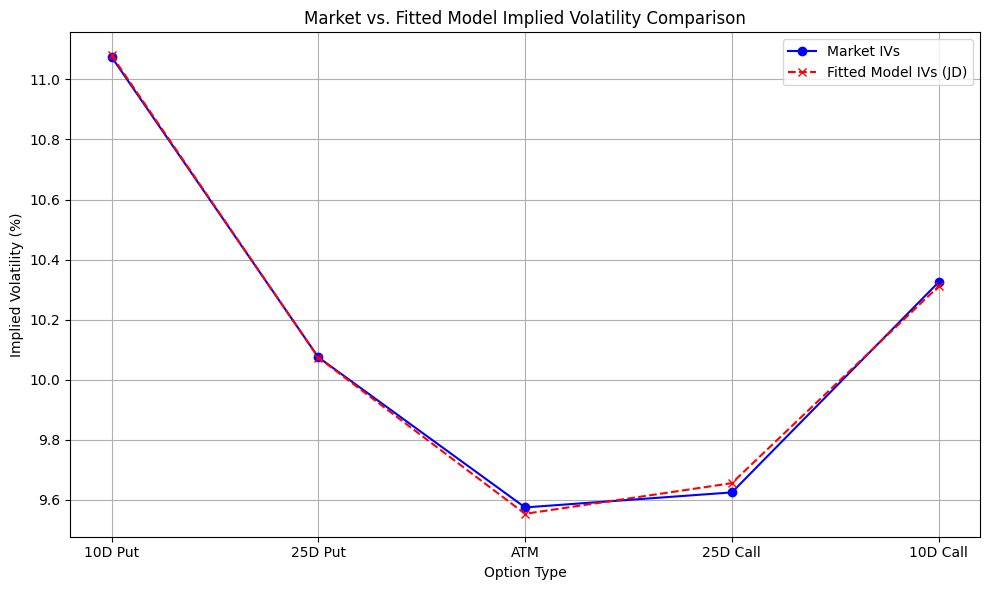

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Market IVs from Task 1 (converted to percentage, order: 10d put, 25d put, ATM, 25d call, 10d call)
market_ivs_perc = np.array([11.075, 10.075, 9.575, 9.625, 10.325])

# Fitted model IVs (converted to percentage) from the last optimization attempt
fitted_ivs_perc = model_iv_fit * 100

# Labels for the x-axis (Option Types)
x_labels = ["10D Put", "25D Put", "ATM", "25D Call", "10D Call"]

# Plotting the Implied Volatility Smile comparison
plt.figure(figsize=(10, 6))
plt.plot(x_labels, market_ivs_perc, marker='o', linestyle='-', color='blue', label='Market IVs')
plt.plot(x_labels, fitted_ivs_perc, marker='x', linestyle='--', color='red', label='Fitted Model IVs (JD)')

plt.title("Market vs. Fitted Model Implied Volatility Comparison")
plt.xlabel("Option Type")
plt.ylabel("Implied Volatility (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# ** extra check/test for different initial parameters gives very similar output/SSE **

# --- Optimization Setup ---
x0 = np.array([0.05, -0.1, 0.5, 0.1])
bounds = [(0.001, 0.3), (-0.5, 0.5), (0.01, 20.0), (0.001, 1.0)]

# --- Run Calibration ---
res = minimize(
    objective_fn,
    x0,
    args=(fixed_strikes_array, callputs),
    method='trust-constr',
    bounds=bounds,
    options={'disp': True, 'xtol': 1e-10, 'gtol': 1e-10, 'maxiter': 5000}
)

# --- Results ---
print("\nFitted parameters [sigma, k, lambda, delta]:", res.x)
print("Success:", res.success)
print("Message:", res.message)
print("Objective (SSE):", res.fun)

# --- Final IV Fit ---
model_iv_fit = generate_model_implied_vols(*res.x, fixed_strikes_array, callputs)
print("Model IVs :", model_iv_fit)
print("Market IVs:", market_ivs)
print("Differences:", market_ivs - model_iv_fit)


`xtol` termination condition is satisfied.
Number of iterations: 615, function evaluations: 3305, CG iterations: 1630, optimality: 3.10e-10, constraint violation: 0.00e+00, execution time: 7e+01 s.

Fitted parameters [sigma, k, lambda, delta]: [ 6.34206267e-02 -3.23867499e-03  7.71278776e+00  2.87427392e-02]
Success: True
Message: `xtol` termination condition is satisfied.
Objective (SSE): 1.6231572648583255e-07
Model IVs : [0.11080359 0.10073963 0.095538   0.09655811 0.1031105 ]
Market IVs: [0.11075 0.10075 0.09575 0.09625 0.10325]
Differences: [-5.35870198e-05  1.03655354e-05  2.12000238e-04 -3.08109298e-04
  1.39503667e-04]
